In [1]:
from salad.serialize import read

In [72]:
detector = 1
snr = 4.0
catalog = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/catalog.pkl")
shuffled_catalog = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/catalog_shuffled.pkl")
# images = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/images.pkl")
fakes = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/fakes.pkl")
# clusters = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/unshuffled/clusters.pkl")
# projection = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/unshuffled/projection.pkl")
# refined1 = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/unshuffled/refined_clusters_1.pkl")
# refined2 = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/unshuffled/refined_clusters_2.pkl")
# refined_filtered = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/unshuffled/refined_clusters_2_filtered.pkl")
search = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/search.pkl")
search_shuffled = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/search_shuffled.pkl")


In [29]:
from salad.cluster.filter import filter_velocity, filter_n

In [73]:
len(search['step2'])

189

In [74]:
search_filter_velocity = list(filter(
    lambda x : filter_velocity(x, vmin=min(search['args']['velocity']), vmax=max(search['args']['velocity'])), 
    search['step2']
))
len(search_filter_velocity)

100

In [75]:
search_filter_n = list(filter(
    lambda x : filter_n(x, n=15), 
    search_filter_velocity
))
len(search_filter_n)

18

In [76]:
search_shuffled_filter_velocity = list(filter(
    lambda x : filter_velocity(x, vmin=min(search['args']['velocity']), vmax=max(search['args']['velocity'])), 
    search_shuffled['step2']
))
len(search_shuffled_filter_velocity)

57

In [77]:
search_shuffled_filter_n = list(filter(
    lambda x : filter_n(x, n=15), 
    search_shuffled_filter_velocity
))
len(search_shuffled_filter_n)

0

In [81]:
def number_of_results(snr):
    detector = 1
    search = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/search.pkl")
    search_shuffled = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/search_shuffled.pkl")
    
    search_filter_velocity = list(filter(
        lambda x : filter_velocity(x, vmin=min(search['args']['velocity']), vmax=max(search['args']['velocity'])), 
        search['step2']
    ))
    search_filter_n = list(filter(
        lambda x : filter_n(x, n=15), 
        search_filter_velocity
    ))
    search_shuffled_filter_velocity = list(filter(
        lambda x : filter_velocity(x, vmin=min(search['args']['velocity']), vmax=max(search['args']['velocity'])), 
        search_shuffled['step2']
    ))
    
    search_shuffled_filter_n = list(filter(
        lambda x : filter_n(x, n=15), 
        search_shuffled_filter_velocity
    ))    
    
    result = {}
    x = np.arange(5)
    y = [
        len(search['clusters']), 
        len(search['step1']), 
        len(search['step2']), 
        len(search_filter_velocity), 
        len(search_filter_n)
    ]
    y_s = [
        len(search_shuffled['clusters']), 
        len(search_shuffled['step1']), 
        len(search_shuffled['step2']), 
        len(search_shuffled_filter_velocity), 
        len(search_shuffled_filter_n)
    ]
    
    result['num_results'] = {
        "x": x,
        "y": y,
        "y_s": y_s
    }

    t = list(range(25))
    x = []
    y = []
    for n in t:
        search_filter_n = list(filter(
            lambda x : filter_n(x, n=n), 
            search_filter_velocity
        ))
        n_results = len(search_filter_n)
        x.append(n_results)
        search_filter_n = list(filter(
            lambda x : filter_n(x, n=n), 
            search_shuffled_filter_velocity
        ))
        n_results = len(search_filter_n)
        y.append(n_results)
    
    result['threshold'] = {
        "t": t,
        "x": x,
        "y": y
    }
    return result
    

In [100]:
snr_5 = number_of_results(5.0)
snr_4 = number_of_results(4.0)
snr_3 = number_of_results(3.0)

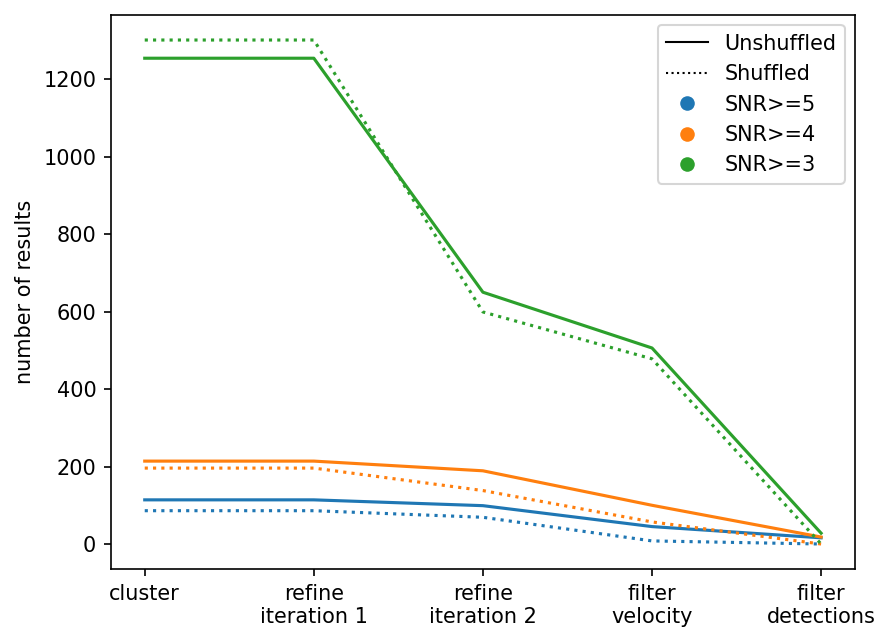

In [133]:
fig = plt.figure(dpi=150)

plt.plot(snr_5['num_results']['x'], snr_5['num_results']['y'], color="C0", ls="-")
plt.plot(snr_5['num_results']['x'], snr_5['num_results']['y_s'], color="C0", ls=":")
plt.plot(snr_4['num_results']['x'], snr_4['num_results']['y'], color="C1", ls="-")
plt.plot(snr_4['num_results']['x'], snr_4['num_results']['y_s'], color="C1", ls=":")
plt.plot(snr_3['num_results']['x'], snr_3['num_results']['y'], color="C2", ls="-")
plt.plot(snr_3['num_results']['x'], snr_3['num_results']['y_s'], color="C2", ls=":")
plt.xticks(snr_5['num_results']['x'], ["cluster", "refine\niteration 1", "refine\niteration 2", "filter\nvelocity", "filter\ndetections"])
plt.ylabel("number of results")
custom_lines = [
    Line2D([0], [0], color="k", lw=1, ls="-", label="Unshuffled"),
    Line2D([0], [0], color="k", lw=1, ls=":", label="Shuffled"),
    Line2D([0], [0], marker="o", lw=0, color='w', markersize=8, markerfacecolor='C0', label="SNR>=5"),
    Line2D([0], [0], marker="o", lw=0, color='w', markersize=8, markerfacecolor='C1', label="SNR>=4"),
    Line2D([0], [0], marker="o", lw=0, color='w', markersize=8, markerfacecolor='C2', label="SNR>=3"),
]
plt.legend(handles=custom_lines)

plt.show()

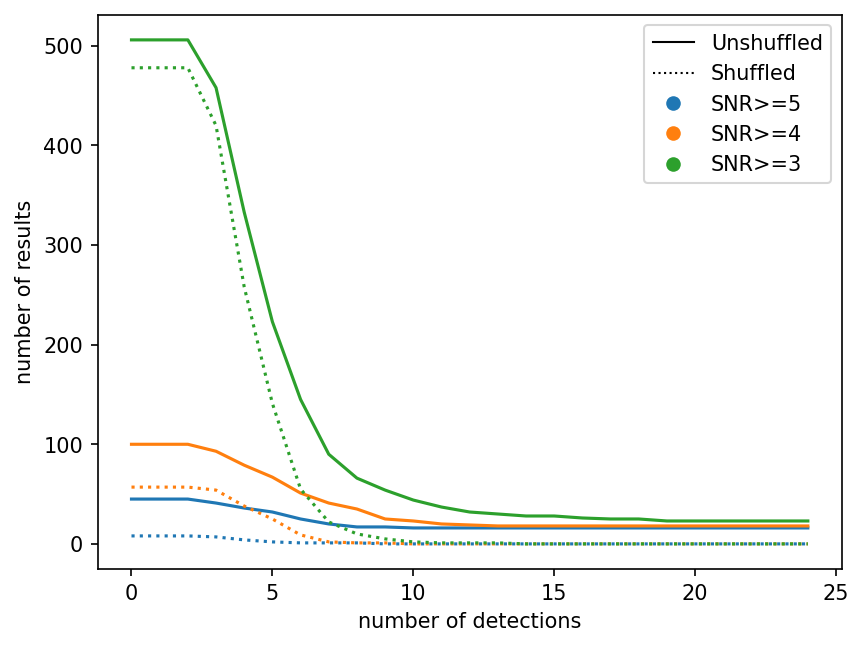

In [129]:
from matplotlib.lines import Line2D

fig = plt.figure(dpi=150)
# plt.scatter(snr_5['threshold']['t'], snr_5['threshold']['x'], color="C0", marker="o")
# plt.scatter(snr_5['threshold']['t'], snr_5['threshold']['y'], color="C0", marker="+")
# plt.scatter(snr_4['threshold']['t'], snr_4['threshold']['x'], color="C1", marker="o")
# plt.scatter(snr_4['threshold']['t'], snr_4['threshold']['y'], color="C1", marker="+")
plt.plot(snr_5['threshold']['t'], snr_5['threshold']['x'], color="C0", ls="-")
plt.plot(snr_5['threshold']['t'], snr_5['threshold']['y'], color="C0", ls=":")
plt.plot(snr_4['threshold']['t'], snr_4['threshold']['x'], color="C1", ls="-")
plt.plot(snr_4['threshold']['t'], snr_4['threshold']['y'], color="C1", ls=":")
plt.plot(snr_3['threshold']['t'], snr_3['threshold']['x'], color="C2", ls="-")
plt.plot(snr_3['threshold']['t'], snr_3['threshold']['y'], color="C2", ls=":")
# plt.xticks(snr_5['num_results']['x'], ["hough", "refine 1", "refine 2", "filter v", "filter n"])
plt.ylabel("number of results")
plt.xlabel("number of detections")
# plt.yscale("log")
custom_lines = [
    Line2D([0], [0], color="k", lw=1, ls="-", label="Unshuffled"),
    Line2D([0], [0], color="k", lw=1, ls=":", label="Shuffled"),
    Line2D([0], [0], marker="o", lw=0, color='w', markersize=8, markerfacecolor='C0', label="SNR>=5"),
    Line2D([0], [0], marker="o", lw=0, color='w', markersize=8, markerfacecolor='C1', label="SNR>=4"),
    Line2D([0], [0], marker="o", lw=0, color='w', markersize=8, markerfacecolor='C2', label="SNR>=3"),
]
plt.legend(handles=custom_lines)
plt.show()

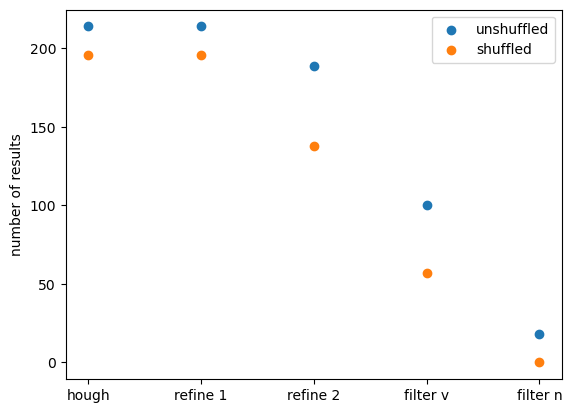

In [78]:
x = np.arange(5)
y = [
    len(search['clusters']), 
    len(search['step1']), 
    len(search['step2']), 
    len(search_filter_velocity), 
    len(search_filter_n)
]
plt.scatter(x, y, label="unshuffled")

y = [
    len(search_shuffled['clusters']), 
    len(search_shuffled['step1']), 
    len(search_shuffled['step2']), 
    len(search_shuffled_filter_velocity), 
    len(search_shuffled_filter_n)
]
plt.scatter(x, y, label="shuffled")
plt.legend()
plt.xticks(x, ["hough", "refine 1", "refine 2", "filter v", "filter n"])
plt.ylabel("number of results")
plt.show()

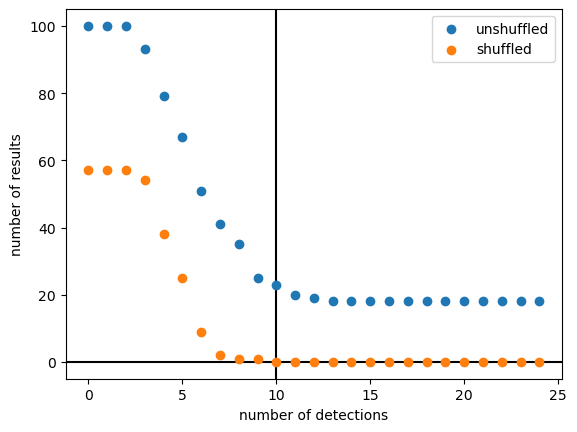

In [80]:
t = list(range(25))
x = []
y = []
for n in t:
    search_filter_n = list(filter(
        lambda x : filter_n(x, n=n), 
        search_filter_velocity
    ))
    n_results = len(search_filter_n)
    x.append(n_results)
    search_filter_n = list(filter(
        lambda x : filter_n(x, n=n), 
        search_shuffled_filter_velocity
    ))
    n_results = len(search_filter_n)
    y.append(n_results)
    
# plt.scatter(x, y, c=t)
# plt.colorbar()
plt.ylabel("number of results")
plt.xlabel("number of detections")
plt.axhline(0, color='k', zorder=-1)
plt.axvline(10, color='k', zorder=-1)
plt.scatter(t, x, label="unshuffled")
plt.scatter(t, y, label="shuffled")
plt.legend()
plt.show()

In [22]:
from salad.search import Search
from salad.directions import SearchDirections
from salad.hough import Hough
from salad.project import project
from salad.analysis.plot import plot_result, plot_cluster
from salad.cluster import Clusters, Cluster
from salad.regression import regression
from salad.gather import gather
from salad.refine import refine
from salad.cluster.filter import filter_n, filter_velocity
from salad.serialize import read, write
from salad.fakes.recover import recover
import pickle
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import logging

logging.basicConfig()
log = logging.getLogger(__name__)

def single_search(catalog, fakes, args):
    X = catalog.X(columns=['ra', 'dec', 'time', 'exposures'])

    # directions
    dt = (max(catalog.time) - min(catalog.time)) * u.day
    reference_time = min(catalog.time) * u.day
    v_range, phi_range, dx = (min(args.velocity)*u.deg/u.day, max(args.velocity)*u.deg/u.day), (min(args.angle)*u.deg, max(args.angle)*u.deg), args.dx*u.arcsec

    b = SearchDirections(v_range, phi_range, dx, dt)
    # plt.scatter(b.b[:, 0], b.b[:, 1])
    # plt.show()

    # projection
    projection = project(X, b, reference_time)
    projection.reference_time = projection.reference_time.value

    # cluster
    hough = Hough(projection, dx, dx)
    hough.max()

    # get clusters
    clusters = Clusters()
    for cluster in hough:
        votes = cluster.extra['votes']
        if votes < args.vote_threshold:
            break
        clusters.add(cluster)    

    recovered_clusters = recover(fakes, clusters, catalog, projection=projection, hough=hough)

    print("there are %d results after clustering" % len(clusters.clusters))

    step1 = Clusters()
#     for cluster in clusters:
#         result = refine(cluster)
#         if result is None:
#             continue
#         result.alpha *= u.deg
#         result.beta *= u.deg/u.day
        
#         mask = gather(result, X[:, 0] * u.deg, X[:, 1] * u.deg, X[:, 2] * u.day, args.gather_threshold[0] * u.arcsec)
#         gathered = Cluster(X[mask], extra=dict(line=result))
#         step1.add(gathered)
    
    recovered_1 = recover(fakes, step1, catalog)
    
    step2 = Clusters()
#     for cluster in step1:
#         result = refine(cluster)
#         if result is None:
#             continue
#         result.alpha *= u.deg
#         result.beta *= u.deg/u.day
        
#         mask = gather(result, X[:, 0] * u.deg, X[:, 1] * u.deg, X[:, 2] * u.day, args.gather_threshold[0] * u.arcsec)
#         gathered = Cluster(X[mask], extra=dict(line=result))
#         step2.add(gathered)
    
    recovered_2 = recover(fakes, step2, catalog)


    print("there are %d results after filtering" % len(filtered))
    out = {
        "hough": hough,
        "clusters": clusters,
        "step1": step1,
        "step2": step2,
        "recovered_clusters": recovered_clusters,
        "recovered_1": recovered_1,
        "recovered_2": recovered_2,
    }    
    return out

In [23]:
class Args:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [24]:
args = Args()
args.velocity = [0.1, 0.5]
args.angle = [120, 240]
args.dx = 10
args.vote_threshold = 25
args.min_points = 15
args.gather_threshold = [1, 1]

result = single_search(catalog, fakes, args)

ValueError: Latitude angle(s) must be within -90 deg <= angle <= 90 deg, got [-5653.82351786 -5653.82351786 -5653.82351786 -5653.82351786
 -5653.82351786 -5653.82351786 -5653.823353   -5653.823353
 -5653.823353   -5653.823353   -5653.823353   -5653.823353
 -5653.82318187 -5653.82318187 -5653.82318187 -5653.82318187
 -5653.82318187 -5653.82318187 -5653.82301703 -5653.82301703
 -5653.82301703 -5653.82301703 -5653.82301703 -5653.82301703
 -5653.82285189 -5653.82285189 -5653.82285189 -5653.82285189
 -5653.82285189 -5653.82285189 -5653.82268659 -5653.82268659
 -5653.82268659 -5653.82268659 -5653.82268659 -5653.82268659
 -5653.8225213  -5653.8225213  -5653.8225213  -5653.8225213
 -5653.8225213  -5653.8225213  -5653.82235527 -5653.82235527
 -5653.82235527 -5653.82235527 -5653.82235527 -5653.82235527
 -5653.82219087 -5653.82219087 -5653.82219087 -5653.82219087
 -5653.82219087 -5653.82219087 -5653.82202552 -5653.82202552
 -5653.82202552 -5653.82202552 -5653.82202552 -5653.82202552
 -5653.82186094 -5653.82186094 -5653.82186094 -5653.82186094
 -5653.82186094 -5653.82186094 -5653.82169563 -5653.82169563
 -5653.82169563 -5653.82169563 -5653.82169563 -5653.82169563
 -5653.82153018 -5653.82153018 -5653.82153018 -5653.82153018
 -5653.82153018 -5653.82153018 -5653.82136486 -5653.82136486
 -5653.82136486 -5653.82136486 -5653.82136486 -5653.82136486
 -5653.82119989 -5653.82119989 -5653.82119989 -5653.82119989
 -5653.82119989 -5653.82119989 -5653.82103467 -5653.82103467
 -5653.82103467 -5653.82103467 -5653.82103467 -5653.82103467
 -5653.82086963 -5653.82086963 -5653.82086963 -5653.82086963
 -5653.82086963 -5653.82086963 -5653.82070464 -5653.82070464
 -5653.82070464 -5653.82070464 -5653.82070464 -5653.82070464
 -5653.82053937 -5653.82053937 -5653.82053937 -5653.82053937
 -5653.82053937 -5653.82053937 -5653.8203739  -5653.8203739
 -5653.8203739  -5653.8203739  -5653.8203739  -5653.8203739
 -5653.82020843 -5653.82020843 -5653.82020843 -5653.82020843
 -5653.82020843 -5653.82020843 -5653.82004363 -5653.82004363
 -5653.82004363 -5653.82004363 -5653.82004363 -5653.82004363
 -5653.81987755 -5653.81987755 -5653.81987755 -5653.81987755
 -5653.81987755 -5653.81987755 -5653.81971311 -5653.81971311
 -5653.81971311 -5653.81971311 -5653.81971311 -5653.81971311
 -5653.81954821 -5653.81954821 -5653.81954821 -5653.81954821
 -5653.81954821 -5653.81954821 -5653.81938259 -5653.81938259
 -5653.81938259 -5653.81938259 -5653.81938259 -5653.81938259
 -5653.81921788 -5653.81921788 -5653.81921788 -5653.81921788
 -5653.81921788 -5653.81921788 -5653.81905248 -5653.81905248
 -5653.81905248 -5653.81905248 -5653.81905248 -5653.81905248
 -5653.81888735 -5653.81888735 -5653.81888735 -5653.81888735
 -5653.81888735 -5653.81888735 -5653.81872165 -5653.81872165
 -5653.81872165 -5653.81872165 -5653.81872165 -5653.81872165
 -5653.81850604 -5653.81850604 -5653.81850604 -5653.81850604
 -5653.81850604 -5653.81850604 -5653.81834134 -5653.81834134
 -5653.81834134 -5653.81834134 -5653.81834134 -5653.81834134
 -5653.81817618 -5653.81817618 -5653.81817618 -5653.81817618
 -5653.81817618 -5653.81817618 -5653.81801083 -5653.81801083
 -5653.81801083 -5653.81801083 -5653.81801083 -5653.81801083
 -5653.81784461 -5653.81784461 -5653.81784461 -5653.81784461
 -5653.81784461 -5653.81784461 -5653.81767978 -5653.81767978
 -5653.81767978 -5653.81767978 -5653.81767978 -5653.81767978
 -5653.81751474 -5653.81751474 -5653.81751474 -5653.81751474
 -5653.81751474 -5653.81751474 -5653.81734911 -5653.81734911
 -5653.81734911 -5653.81734911 -5653.81734911 -5653.81734911
 -5653.81718406 -5653.81718406 -5653.81718406 -5653.81718406
 -5653.81718406 -5653.81718406 -5653.81701931 -5653.81701931
 -5653.81701931 -5653.81701931 -5653.81701931 -5653.81701931
 -5653.81685495 -5653.81685495 -5653.81685495 -5653.81685495
 -5653.81685495 -5653.81685495 -5653.81668879 -5653.81668879
 -5653.81668879 -5653.81668879 -5653.81668879 -5653.81668879
 -5653.81652143 -5653.81652143 -5653.81652143 -5653.81652143
 -5653.81652143 -5653.81652143 -5653.8163557  -5653.8163557
 -5653.8163557  -5653.8163557  -5653.8163557  -5653.8163557
 -5653.8161899  -5653.8161899  -5653.8161899  -5653.8161899
 -5653.8161899  -5653.8161899  -5653.81600709 -5653.81600709
 -5653.81600709 -5653.81600709 -5653.81600709 -5653.81600709
 -5653.81584118 -5653.81584118 -5653.81584118 -5653.81584118
 -5653.81584118 -5653.81584118 -5653.81567623 -5653.81567623
 -5653.81567623 -5653.81567623 -5653.81567623 -5653.81567623
 -5653.81551032 -5653.81551032 -5653.81551032 -5653.81551032
 -5653.81551032 -5653.81551032 -5653.81534479 -5653.81534479
 -5653.81534479 -5653.81534479 -5653.81534479 -5653.81534479
 -5653.81517952 -5653.81517952 -5653.81517952 -5653.81517952
 -5653.81517952 -5653.81517952 -5653.81501415 -5653.81501415
 -5653.81501415 -5653.81501415 -5653.81501415 -5653.81501415
 -5653.81484972 -5653.81484972 -5653.81484972 -5653.81484972
 -5653.81484972 -5653.81484972 -5653.81468402 -5653.81468402
 -5653.81468402 -5653.81468402 -5653.81468402 -5653.81468402
 -5653.8145186  -5653.8145186  -5653.8145186  -5653.8145186
 -5653.8145186  -5653.8145186  -5653.8143538  -5653.8143538
 -5653.8143538  -5653.8143538  -5653.8143538  -5653.8143538
 -5653.81418863 -5653.81418863 -5653.81418863 -5653.81418863
 -5653.81418863 -5653.81418863 -5653.81402337 -5653.81402337
 -5653.81402337 -5653.81402337 -5653.81402337 -5653.81402337
 -5653.81385859 -5653.81385859 -5653.81385859 -5653.81385859
 -5653.81385859 -5653.81385859 -5653.81369334 -5653.81369334
 -5653.81369334 -5653.81369334 -5653.81369334 -5653.81369334
 -5653.81352836 -5653.81352836 -5653.81352836 -5653.81352836
 -5653.81352836 -5653.81352836 -5653.81336148 -5653.81336148
 -5653.81336148 -5653.81336148 -5653.81336148 -5653.81336148
 -5653.81319657 -5653.81319657 -5653.81319657 -5653.81319657
 -5653.81319657 -5653.81319657 -5653.81303125 -5653.81303125
 -5653.81303125 -5653.81303125 -5653.81303125 -5653.81303125
 -5653.81286618 -5653.81286618 -5653.81286618 -5653.81286618
 -5653.81286618 -5653.81286618 -5653.8127006  -5653.8127006
 -5653.8127006  -5653.8127006  -5653.8127006  -5653.8127006
 -5653.81253553 -5653.81253553 -5653.81253553 -5653.81253553
 -5653.81253553 -5653.81253553 -5653.81237022 -5653.81237022
 -5653.81237022 -5653.81237022 -5653.81237022 -5653.81237022
 -5653.81220506 -5653.81220506 -5653.81220506 -5653.81220506
 -5653.81220506 -5653.81220506 -5653.8120401  -5653.8120401
 -5653.8120401  -5653.8120401  -5653.8120401  -5653.8120401
 -5653.81187451 -5653.81187451 -5653.81187451 -5653.81187451
 -5653.81187451 -5653.81187451 -5653.81170934 -5653.81170934
 -5653.81170934 -5653.81170934 -5653.81170934 -5653.81170934
 -5653.81154316 -5653.81154316 -5653.81154316 -5653.81154316
 -5653.81154316 -5653.81154316 -5653.81137843 -5653.81137843
 -5653.81137843 -5653.81137843 -5653.81137843 -5653.81137843
 -5653.81121313 -5653.81121313 -5653.81121313 -5653.81121313
 -5653.81121313 -5653.81121313 -5653.81101328 -5653.81101328
 -5653.81101328 -5653.81101328 -5653.81101328 -5653.81101328
 -5653.81084714 -5653.81084714 -5653.81084714 -5653.81084714
 -5653.81084714 -5653.81084714 -5653.8106801  -5653.8106801
 -5653.8106801  -5653.8106801  -5653.8106801  -5653.8106801
 -5653.81051463 -5653.81051463 -5653.81051463 -5653.81051463
 -5653.81051463 -5653.81051463 -5653.81034851 -5653.81034851
 -5653.81034851 -5653.81034851 -5653.81034851 -5653.81034851
 -5653.81018312 -5653.81018312 -5653.81018312 -5653.81018312
 -5653.81018312 -5653.81018312 -5653.81001767 -5653.81001767
 -5653.81001767 -5653.81001767 -5653.81001767 -5653.81001767
 -5653.80985209 -5653.80985209 -5653.80985209 -5653.80985209
 -5653.80985209 -5653.80985209 -5653.80968701 -5653.80968701
 -5653.80968701 -5653.80968701 -5653.80968701 -5653.80968701
 -5653.80968701 -5653.80952045 -5653.80952045 -5653.80952045
 -5653.80952045 -5653.80952045 -5653.80952045 -5653.80952045
 -5653.809355   -5653.809355   -5653.809355   -5653.809355
 -5653.809355   -5653.809355   -5653.809355   -5653.80918821
 -5653.80918821 -5653.80918821 -5653.80918821 -5653.80918821
 -5653.80918821 -5653.80918821 -5653.80902056 -5653.80902056
 -5653.80902056 -5653.80902056 -5653.80902056 -5653.80902056
 -5653.80902056 -5653.80885603 -5653.80885603 -5653.80885603
 -5653.80885603 -5653.80885603 -5653.80885603 -5653.80885603
 -5653.80868981 -5653.80868981 -5653.80868981 -5653.80868981
 -5653.80868981 -5653.80868981 -5653.80868981 -5653.80848579
 -5653.80848579 -5653.80848579 -5653.80848579 -5653.80848579
 -5653.80848579 -5653.80848579 -5653.80832068 -5653.80832068
 -5653.80832068 -5653.80832068 -5653.80832068 -5653.80832068
 -5653.80832068 -5653.80815375 -5653.80815375 -5653.80815375
 -5653.80815375 -5653.80815375 -5653.80815375 -5653.80815375
 -5653.80798857 -5653.80798857 -5653.80798857 -5653.80798857
 -5653.80798857 -5653.80798857 -5653.80798857 -5653.80782362
 -5653.80782362 -5653.80782362 -5653.80782362 -5653.80782362
 -5653.80782362 -5653.80782362 -5653.80765826 -5653.80765826
 -5653.80765826 -5653.80765826 -5653.80765826 -5653.80765826
 -5653.80765826 -5653.80749306 -5653.80749306 -5653.80749306
 -5653.80749306 -5653.80749306 -5653.80749306 -5653.80749306
 -5653.80732844 -5653.80732844 -5653.80732844 -5653.80732844
 -5653.80732844 -5653.80732844 -5653.80732844 -5653.80716146
 -5653.80716146 -5653.80716146 -5653.80716146 -5653.80716146
 -5653.80716146 -5653.80716146 -5653.80699672 -5653.80699672
 -5653.80699672 -5653.80699672 -5653.80699672 -5653.80699672
 -5653.80699672 -5653.80683085 -5653.80683085 -5653.80683085
 -5653.80683085 -5653.80683085 -5653.80683085 -5653.80683085
 -5653.80666606 -5653.80666606 -5653.80666606 -5653.80666606
 -5653.80666606 -5653.80666606 -5653.80666606 -5653.8065002
 -5653.8065002  -5653.8065002  -5653.8065002  -5653.8065002
 -5653.8065002  -5653.8065002  -5653.80633438 -5653.80633438
 -5653.80633438 -5653.80633438 -5653.80633438 -5653.80633438
 -5653.80633438] deg

In [134]:
detector = 1
snr = 5.0
search = read(f"../search/new_pipeline/DEEP/20190403/A0c/detector_{detector}/snr_{snr}/search.pkl")